# NLP

- 1. Data cleaning

- 2. Text to vector

- 3. Model Building

- 4. Model Evalution methods

- 5. Save the model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Show all columns and widen display
pd.set_option('display.max_columns', None)        # Show all columns
pd.set_option('display.width', 1000)              # Increase console width
pd.set_option('display.max_colwidth', None)       # Show full content in each column (esp. text)


# Data Load

In [3]:
df = pd.read_csv(r"IMDB Dataset.csv")
df = df.iloc[:1000,:]
df.head(2)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


<Axes: xlabel='sentiment'>

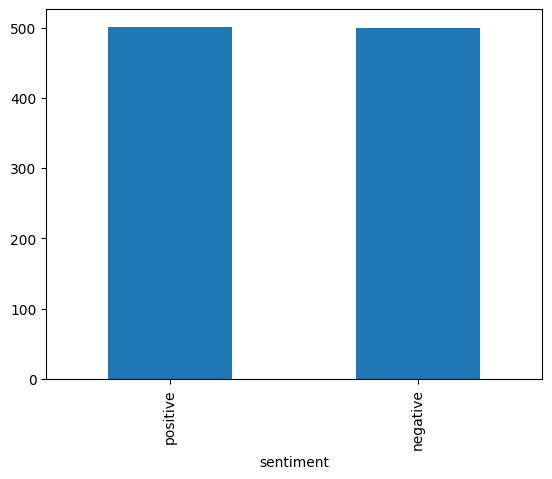

In [5]:
df["sentiment"].value_counts().plot(kind="bar")

In [6]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Step - 1 (Data Preprocessing)

## 🔹 Stage 1: Raw Text Cleaning.

In [7]:
import re
import string

def text_preprocessing(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove full/partial URLs
    text = re.sub(r'https?://\S*|www\.\S*|https?|http', '', text)
    
    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 4. Remove emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002700-\U000027BF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA70-\U0001FAFF"
        "\U00002600-\U000026FF"
        "\U000025A0-\U000025FF"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # 5. Remove mentions and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # 6. Remove common domain suffixes like .com, .org, etc.
    text = re.sub(r'\b(?:\.?com|\.?net|\.?org|\.?in|\.?edu|\.?gov)\b', '', text)

    # 7. Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    # 8. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text



df["cleaned_review"] = df["review"].apply(text_preprocessing)

In [8]:
df.head(1)

,review,sentiment,cleaned_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get touch with your darker side


## 🔹 Stage 2: Token-Level Processing

In [9]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from textblob import TextBlob
import swifter

# Download required NLTK resources
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")  # fixed typo here
nltk.download("stopwords")
nltk.download("wordnet")

# Function to convert NLTK POS tags to WordNet POS
def get_wordnet_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Stage 2: Token-level preprocessing
def stage2_token_preprocessing(text, correct_spelling=False):

    # 1. Tokenization
    tokens = word_tokenize(text)

    # 2. Stopword removal
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # 3. POS tagging
    pos_tags = pos_tag(tokens)
    # nltk.ne_chunk(stage2_token_preprocessing(pos_tags)).draw()


    # 4. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    lemmatized_text = " ".join(lemmatized_tokens)

    # 5. Optional spelling correction -------> it takes too much time to process so we are not use this one.
    if correct_spelling:
        corrected_text = str(TextBlob(lemmatized_text).correct())
    else:
        corrected_text = lemmatized_text

    return lemmatized_text

df["cleaned_review"] = df["cleaned_review"].swifter.apply(lambda X: stage2_token_preprocessing(X, correct_spelling=False))

print(df["cleaned_review"])


c:\Users\hello\OneDrive\Desktop\pc\krish\NLP main\.nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hello\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hello\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hello\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hello\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Pandas Apply: 100%|██████████| 1000/1000 

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           one reviewer mention watch 1

In [10]:
df.head(1)

,review,sentiment,cleaned_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side


## 🔹 Stage 3: Semantic-Level

-  Synonym Normalization
-  Frequency Filtering


In [11]:
# Synonym Normalization

from nltk.tokenize import word_tokenize

synonym_dict = {
    'excellent': 'good',
    'great': 'good',
    'awesome': 'good',
    'amazing': 'good',
    'terrible': 'bad',
    'awful': 'bad',
    'horrible': 'bad',
    'poor': 'bad'
}

def normalize_synonyms(text):
    tokens = word_tokenize(text)
    return ' '.join([synonym_dict.get(word, word) for word in tokens])

df["review_synonyms"] = df["cleaned_review"].apply(normalize_synonyms)


In [12]:
df.head(1)

,review,sentiment,cleaned_review,review_synonyms
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side,one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side


In [13]:
# Frequency Filtering
# Removes very rare or overly common terms.

from collections import Counter

all_words = ' '.join(df['review_synonyms']).split()
word_freq = Counter(all_words)

min_freq = 2
max_freq = 0.8 * len(df)

def frequency_filter(text):
    return ' '.join([word for word in text.split() if min_freq <= word_freq[word] <= max_freq])

df["review_filtered"] = df["review_synonyms"].apply(frequency_filter)


In [14]:
df.head(1)

,review,sentiment,cleaned_review,review_synonyms,review_filtered
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side,one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side,reviewer mention watch 1 oz episode hook right exactly happen 

In [15]:
df = df[["review_filtered", "sentiment"]]

df.head(1)

,review_filtered,sentiment
0,reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state focus mainly city experimental section prison cell glass front face high agenda em city home many aryan muslim latinos christian italian irish scuffle death stare dodgy agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side,positive


<hr>

<hr>

# Step - 2 (text - num)

| Technique Type  | Examples                          | Captures                     |
| --------------- | --------------------------------- | ---------------------------- |
| Count-based     | BoW, TF-IDF, N-grams              | Frequency                    |
| Embedding-based | Word2Vec, GloVe, BERT             | Semantics                    |
| Sentence-level  | SBERT, USE, Doc2Vec               | Context + Semantics          |
| Custom features | POS tags, sentiment, char n-grams | Structure or lexicon insight |


- Count-based
    - Bag of Words (BoW)
    - TF-IDF (Term Frequency–Inverse Document Frequency)
    - TF-IDF with N-grams
    - N-gram Features

- Embedding-based
    - Word Embeddings (Word2Vec, GloVe, FastText)

- Custom features
    - Part-of-Speech (POS) Tag Features
    - Custom Lexicon Features (VADER, TextBlob)

- Sentence-level
    - Document Embeddings (Doc2Vec, Sentence-BERT (SBERT), Universal Sentence Encoder)
    - Transformer-based Embeddings (BERT, RoBERTa, DistilBERT, GPT-like models)

In [56]:
## 🔹 1. Bag of Words (BoW)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create and fit CountVectorizer
bow = CountVectorizer()
# X_bow = bow.fit_transform(df["review_filtered"])
X = bow.fit_transform(df["review_filtered"])
y = df["sentiment"]  # 'sentiment' is your target column

print("vocabulary_", bow.vocabulary_)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Vocabulary size:", len(bow.vocabulary_))
print("BoW Shape:", X.shape)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

vocabulary_ {'reviewer': 5904, 'mention': 4476, 'watch': 7642, 'oz': 5063, 'episode': 2407, 'hook': 3392, 'right': 5937, 'exactly': 2489, 'happen': 3201, 'first': 2723, 'thing': 7078, 'strike': 6785, 'brutality': 984, 'unflinching': 7375, 'scene': 6143, 'violence': 7558, 'set': 6271, 'word': 7781, 'go': 3029, 'trust': 7273, 'show': 6359, 'faint': 2589, 'hearted': 3267, 'pull': 5545, 'punch': 5550, 'regard': 5752, 'drug': 2177, 'sex': 6282, 'hardcore': 3211, 'classic': 1328, 'use': 7464, 'call': 1059, 'nickname': 4811, 'give': 3007, 'oswald': 5007, 'maximum': 4414, 'security': 6207, 'state': 6704, 'focus': 2769, 'mainly': 4308, 'city': 1311, 'experimental': 2536, 'section': 6205, 'prison': 5459, 'cell': 1183, 'glass': 3013, 'front': 2878, 'face': 2576, 'high': 3330, 'agenda': 270, 'em': 2314, 'home': 3377, 'many': 4341, 'aryan': 524, 'muslim': 4706, 'latinos': 4037, 'christian': 1284, 'italian': 3760, 'irish': 3740, 'scuffle': 6184, 'death': 1823, 'stare': 6695, 'dodgy': 2095, 'agreemen

In [16]:
## 🔹 2. TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create and fit TF-IDF Vectorizer
tfidf = TfidfVectorizer(norm="l2", max_df=0.8, min_df=2)
X_tfidf = tfidf.fit_transform(df["review_filtered"])
y = df["sentiment"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

feature_names = tfidf.get_feature_names_out()

print("Feature names:", feature_names)
print("IDF values:", tfidf.idf_)
print("TF-IDF Shape:", X_tfidf.shape)
print("Training set shape:", X_train.shape) 
print("Test set shape:", X_test.shape)


Feature names: ['00' '000' '10' ... 'zone' 'zoom' 'zucker']
IDF values: [6.29931687 5.51085951 2.90480847 ... 6.11699531 5.96284463 6.81014249]
TF-IDF Shape: (1000, 7027)
Training set shape: (800, 7027)
Test set shape: (200, 7027)


In [58]:
# 🔹 3. N-grams (TF-IDF with Bigrams)

tfidf_ngram = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf_ngram = tfidf_ngram.fit_transform(df["review_filtered"])

print("TF-IDF with Bigrams Shape:", X_tfidf_ngram.shape)


TF-IDF with Bigrams Shape: (1000, 95591)


In [59]:
# 🔹 4. Word2Vec (Using Gensim) sg = 0 for CBOW

import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split

# Tokenize reviews
tokenized_reviews = df["review_filtered"].apply(lambda X: X.split())

# Split into train and test sets
train_reviews, test_reviews, y_train, y_test = train_test_split(tokenized_reviews, df["sentiment"], test_size=0.2, random_state=42)

# Train Word2Vec model on training data only
w2v_model = Word2Vec(sentences=train_reviews, vector_size=100, window=5, min_count=5, workers=4, sg=0) # 0 for CBOW

# Test on some examples
vector = w2v_model.wv["episode"]
print(r"Example vector for 'episode': ", vector)

most_similar = w2v_model.wv.most_similar("episode") 
print(r"Most similar words to 'episode': ", most_similar)

similarity = w2v_model.wv.similarity('episode', 'hook')
print(r"Similarity between 'episode' and 'hook': ", similarity)

Example vector for 'episode':  [-0.12226368  0.37132812 -0.05296483 -0.04086695  0.04985386 -0.5209561
  0.1426989   0.72273624 -0.23197277 -0.20400268 -0.1753655  -0.41368544
  0.00686043  0.06057981  0.15228547 -0.31073287  0.09749199 -0.49146992
  0.05653435 -0.6182984   0.19145378  0.04072395  0.15187007 -0.27387375
 -0.2308043  -0.05778447 -0.38318995 -0.36591756 -0.3349145   0.19657028
  0.43029633  0.20172684  0.03895129 -0.1501723  -0.23502544  0.5462322
 -0.03049541 -0.35697275 -0.31818873 -0.78973585  0.12941733 -0.3438913
 -0.05446948 -0.09536227  0.39786372 -0.19961767 -0.21303114 -0.06175894
  0.11004527  0.26561075  0.25952914 -0.31087697 -0.10079453 -0.06631013
 -0.20589504  0.3483796   0.15463649 -0.05762403 -0.38706338  0.13728562
  0.23064943  0.18443877 -0.08588164  0.06967627 -0.4262166   0.38161469
  0.11821446  0.1159609  -0.517144    0.45959443 -0.13729648  0.14733692
  0.39746624 -0.13715194  0.4257008   0.216052   -0.04249959  0.00091617
 -0.30872345  0.2700543

In [60]:
# 🔹 4. Word2Vec (Using Gensim) sg = 1  for skip-gram

import gensim
from gensim.models import Word2Vec
import numpy as np

tokenized_reviews = df["review_filtered"].apply(lambda X: X.split())

w2v_model = Word2Vec(sentences = tokenized_reviews, vector_size = 100, window=5, min_count=5, workers = 4, sg=1)  # 1 for skip-gram; 0 for CBOW


vector = w2v_model.wv["episode"]
print(r"vector: ", vector)

most_similar = w2v_model.wv.most_similar("episode")
print(r"most similar : ",most_similar )

similarity = w2v_model.wv.similarity('episode', 'hook')
print(r"similarity : ",similarity)

vector:  [-0.06207046  0.17410094  0.0180783   0.03822099  0.02759135 -0.2639375
  0.07617879  0.3767012   0.02373803 -0.08404993 -0.03118126 -0.20481467
  0.02191056  0.08117181 -0.00640177 -0.00067539  0.14017664 -0.15938161
  0.02220535 -0.2987514   0.06960448  0.06484812  0.12348473 -0.04704493
 -0.07269689 -0.02203097 -0.1557774  -0.02426853 -0.20752847  0.00427764
  0.31610954 -0.02126566  0.1953952  -0.19818854 -0.05851408  0.20805892
  0.12667543 -0.16714616 -0.20683551 -0.26733688 -0.06147354 -0.09419603
 -0.17561552  0.0253554   0.12033582 -0.06515316 -0.15283345 -0.11434569
  0.10600363  0.20816354  0.1819529  -0.08567669 -0.08986889 -0.04880084
 -0.05978596  0.09595489  0.19951151  0.00243296 -0.21660714  0.00184908
 -0.06615144 -0.00493983  0.01170172 -0.03461715 -0.23580536  0.14692457
 -0.01432924  0.1550667  -0.22660622  0.23453858 -0.14180392  0.08579899
  0.2261792   0.03844137  0.24272856  0.02133329 -0.05329041  0.0187325
 -0.17412907  0.09744716 -0.09831861 -0.0421

In [61]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

# Step 1: Tokenize cleaned reviews and split data
tokenized_reviews = df["review_filtered"].apply(lambda x: x.split())

# Split into train and test sets
train_reviews, test_reviews, y_train, y_test = train_test_split(tokenized_reviews, df["sentiment"], test_size=0.2, random_state=42)

# Step 2: Train Word2Vec model on training data only
w2v_model = Word2Vec( 
    sentences=train_reviews,
    vector_size=100,      # dimensionality of vectors  
    window=5,             # context window
    min_count=2,          # ignore rare words
    workers=4,
    sg=1                  # 1 for skip-gram; 0 for CBOW
)

# Step 3: Function to compute average vector
def get_avg_w2v(tokens, model, vector_size):
    valid_words = [word for word in tokens if word in model.wv]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

# Step 4: Apply to train and test sets separately
vector_size = w2v_model.vector_size

# Get vectors for training set
X_train_w2v = np.vstack([
    get_avg_w2v(tokens, w2v_model, vector_size) 
    for tokens in train_reviews
])

# Get vectors for test set 
X_test_w2v = np.vstack([
    get_avg_w2v(tokens, w2v_model, vector_size)
    for tokens in test_reviews
])

print("Training set shape:", X_train_w2v.shape)
print("Test set shape:", X_test_w2v.shape)



Training set shape: (800, 100)
Test set shape: (200, 100)


In [68]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# -----------------------------------------------
# Step 1: Download and Extract GloVe
# -----------------------------------------------
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"
glove_folder = "glove.6B"
glove_file = "glove.6B.100d.txt"
glove_path = os.path.join(glove_folder, glove_file)

if not os.path.exists(glove_path):
    if not os.path.exists(glove_zip_path):
        print("🔽 Downloading GloVe...")
        response = requests.get(glove_url, stream=True)
        with open(glove_zip_path, "wb") as f:
            for chunk in tqdm(response.iter_content(chunk_size=1024)):
                if chunk:
                    f.write(chunk)
    print("📦 Extracting GloVe...")
    with zipfile.ZipFile(glove_zip_path, "r") as zip_ref:
        zip_ref.extractall(glove_folder)
else:
    print("✅ GloVe already available.")

# -----------------------------------------------
# Step 2: Load GloVe Embeddings
# -----------------------------------------------
print("📖 Loading GloVe vectors...")
glove_embeddings = {}
with open(glove_path, encoding="utf8") as f:
    for line in tqdm(f, total=400000):
        values = line.strip().split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector
print("✅ GloVe loaded.")

# -----------------------------------------------
# Step 3: Define GloVe Vectorizer
# -----------------------------------------------
def get_avg_glove(tokens):
    vectors = [glove_embeddings[word] for word in tokens if word in glove_embeddings]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# -----------------------------------------------
# Step 4: Example Dataset
# -----------------------------------------------
# Create a separate DataFrame for GloVe vectors
df_glove = pd.DataFrame()
df_glove["review_filtered"] = df["review_filtered"]
df_glove["sentiment"] = df["sentiment"]

# Tokenize
tokenized_reviews = df_glove["review_filtered"].apply(lambda x: x.lower().split())

# Apply GloVe vectorization and store in DataFrame
df_glove["glove_vector"] = tokenized_reviews.apply(get_avg_glove)
X = np.vstack(df_glove["glove_vector"].values)
y = df_glove["sentiment"].values

# -----------------------------------------------
# Step 5: Train/Test Split
# -----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------
# Step 6: Train Classifier
# -----------------------------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# -----------------------------------------------
# Step 7: Evaluation
# -----------------------------------------------
y_pred = model.predict(X_test)

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))


✅ GloVe already available.
📖 Loading GloVe vectors...


100%|██████████| 400000/400000 [00:06<00:00, 65774.55it/s]


✅ GloVe loaded.

🔍 Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.77      0.77       104
    positive       0.75      0.76      0.76        96

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.77      0.77       200

🎯 Accuracy: 0.765


In [69]:
df.head(1)

,review_filtered,sentiment
0,reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state focus mainly city experimental section prison cell glass front face high agenda em city home many aryan muslim latinos christian italian irish scuffle death stare dodgy agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side,positive


In [70]:
import os
os.environ["USE_TF"] = "0"  # 👈 Add this line at the top

from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_bert = bert_model.encode(df["review_filtered"].tolist(), show_progress_bar=True)


print("✅ BERT Embeddings Shape:", X_bert.shape)

# -----------------------------------------------
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)
# -----------------------------------------------


Batches: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]

✅ BERT Embeddings Shape: (1000, 384)
(800, 384)
(200, 384)
(800,)
(800,)


In [71]:
# 🔹 7. POS Tag Frequency Features

from nltk import pos_tag, word_tokenize
from collections import Counter

def pos_features(text):
    tags = [tag for word, tag in pos_tag(word_tokenize(text))]
    count = Counter(tags)
    return count

pos_df = pd.DataFrame()
pos_df["review_filtered"] = df["review_filtered"]
pos_df["sentiment"] = df["sentiment"]

# Get POS features
pos_df["pos_counts"] = pos_df["review_filtered"].apply(pos_features)
df_pos = pos_df["pos_counts"].apply(lambda x: pd.Series(x)).fillna(0)

# Split into train/test sets
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(
    df_pos, pos_df["sentiment"], test_size=0.2, random_state=42
)

print("POS Train Shape:", X_pos_train.shape)
print("POS Test Shape:", X_pos_test.shape)


POS Train Shape: (800, 34)
POS Test Shape: (200, 34)


In [73]:
# 🔹 8. Sentiment Features (TextBlob)

from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

tbob_df = pd.DataFrame()
tbob_df["review_filtered"] = df["review_filtered"]
tbob_df["sentiment"] = df["sentiment"]

tbob_df[['polarity', 'subjectivity']] = tbob_df["review_filtered"].apply(get_sentiment)

# Split sentiment features into train/test sets
X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(
    tbob_df[['polarity', 'subjectivity']], tbob_df["sentiment"], test_size=0.2, random_state=42
)

print("Sentiment Train Shape:", X_sent_train.shape)
print("Sentiment Test Shape:", X_sent_test.shape)


Sentiment Train Shape: (800, 2)
Sentiment Test Shape: (200, 2)


<hr>

In [74]:
df.head(1)

,review_filtered,sentiment
0,reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state focus mainly city experimental section prison cell glass front face high agenda em city home many aryan muslim latinos christian italian irish scuffle death stare dodgy agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view thats get touch darker side,positive


<hr>

<hr>

<hr>

## column X encoding is done NOW
## Label Encoding of y column

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["sentiment"])

# Step - 3. Model Building

## ✅ Preparing Labels and Splitting the Dataset


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

X = X_tfidf


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)



(800, 7027)
(200, 7027)
(800,)
(800,)


## Using ML Models

In [17]:
# 🔹 1. Logistic Regression (BoW or TF-IDF)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.825
              precision    recall  f1-score   support

    negative       0.87      0.78      0.82       104
    positive       0.79      0.88      0.83        96

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



In [20]:
import joblib

# Save the model to a file
joblib.dump(log_model, "logistic_regression_model.pkl")
print("Model saved as logistic_regression_model.pkl")


# Save the TF-IDF vectorizer
joblib.dump(tfidf, "tfidf.pkl")
print("TF-IDF vectorizer saved as tfidf.pkl")


Model saved as logistic_regression_model.pkl
TF-IDF vectorizer saved as tfidf.pkl


In [21]:
import joblib
from collections import Counter

# Load model and vectorizer
log_model = joblib.load("logistic_regression_model.pkl")
tfidf = joblib.load("tfidf.pkl")  # Must be the same used during training

# Your preprocessing functions (reuse from earlier)
def frequency_filter(text):
    words = text.split()
    word_freq = Counter(words)
    min_freq = 2
    max_freq = 0.8 * len(words)
    return ' '.join([word for word in words if min_freq <= word_freq[word] <= max_freq])

# Preprocessing pipeline (make sure all 4 steps match training)
def preprocess_pipeline(text):
    text = text_preprocessing(text)
    text = stage2_token_preprocessing(text)
    text = normalize_synonyms(text)
    text = frequency_filter(text)
    return text

# Predict function
def predict_sentiment_logreg(text):
    cleaned_text = preprocess_pipeline(text)
    vec = tfidf.transform([cleaned_text])
    prediction = log_model.predict(vec)
    prob = log_model.predict_proba(vec)[0][1]  # probability of positive
    label = "Positive" if prediction[0] == 1 else "Negative"
    return label, prob

# Test
new_review = "This movie was slow and boring, I didn't enjoy it."
sentiment, confidence = predict_sentiment_logreg(new_review)
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")


Predicted Sentiment: Negative (Confidence: 0.56)


<hr>

In [82]:
# 🔹 2. Naive Bayes (BoW or TF-IDF)

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       104
           1       0.86      0.76      0.81        96

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [83]:
# 🔹 3. SVM (TF-IDF recommended)

from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       104
           1       0.78      0.85      0.82        96

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



In [84]:
# 🔹 4. Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       104
           1       0.75      0.78      0.77        96

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       104
           1       0.72      0.69      0.70        96

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\Users\hello\OneDrive\Desktop\pc\krish\NLP main\.nlp\lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       104
           1       0.72      0.81      0.76        96

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



In [88]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


AdaBoost Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       104
           1       0.71      0.83      0.77        96

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



In [89]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)

print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Extra Trees Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       104
           1       0.81      0.80      0.81        96

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [90]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_model = PassiveAggressiveClassifier()
pa_model.fit(X_train, y_train)
y_pred = pa_model.predict(X_test)

print("Passive Aggressive Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Passive Aggressive Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       104
           1       0.80      0.84      0.82        96

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



<hr>

## Using DL Models

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Bidirectional, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Attention, Input
from tensorflow.keras.models import Model
import tensorflow as tf


In [20]:
# 🔸 a. Feedforward Neural Network (FFNN)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=10),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ffnn = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


c:\Users\hello\OneDrive\Desktop\pc\krish\NLP main\.nlp\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 496ms/step - accuracy: 0.4870 - loss: 18.5079 - val_accuracy: 0.5200 - val_loss: 0.6926
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 465ms/step - accuracy: 0.4785 - loss: 0.9787 - val_accuracy: 0.4800 - val_loss: 0.6932
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.4829 - loss: 0.6932 - val_accuracy: 0.4800 - val_loss: 0.6932
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.5043 - loss: 0.6931 - val_accuracy: 0.4800 - val_loss: 0.6933
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 459ms/step - accuracy: 0.5066 - loss: 0.6931 - val_accuracy: 0.4800 - val_loss: 0.6933


# step - 5 Save model
- Tried to build model and deploy on streamlit web app

In [27]:
import joblib
joblib.dump(ffnn, "ffnn.pkl")


['ffnn.pkl']

In [24]:
# After training
model.save("ffnn_model.keras")
print("Model saved as 'ffnn_model.keras'")


Model saved as 'ffnn_model.keras'


In [25]:
from tensorflow.keras.models import load_model

model = load_model("ffnn_model.keras")

print("Model loaded successfully")


Model loaded successfully


c:\Users\hello\OneDrive\Desktop\pc\krish\NLP main\.nlp\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Stpe -4 (Model Evalution methods)
- ✅ 1. Check Training and Validation Accuracy/Loss
- ✅ 2. Classification Report and Confusion Matrix
- ✅ 3. roc_curve, auc


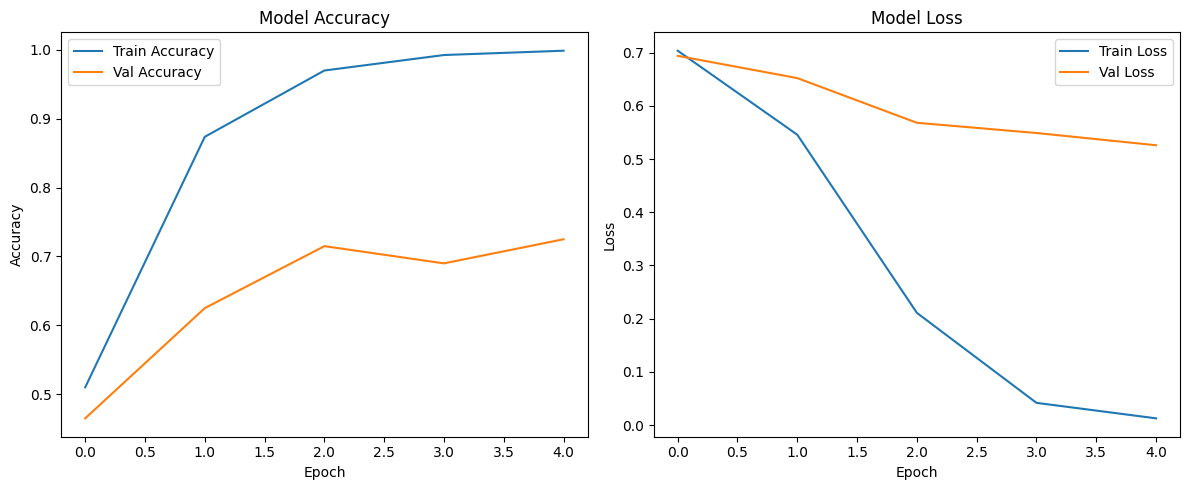

In [ ]:
# ✅ 1. Check Training and Validation Accuracy/Loss

import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
axs[0].plot(ffnn.history['accuracy'], label='Train Accuracy')
axs[0].plot(ffnn.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Loss plot
axs[1].plot(ffnn.history['loss'], label='Train Loss')
axs[1].plot(ffnn.history['val_loss'], label='Val Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Display both plots
plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       104
           1       0.70      0.74      0.72        96

    accuracy                           0.72       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.73       200



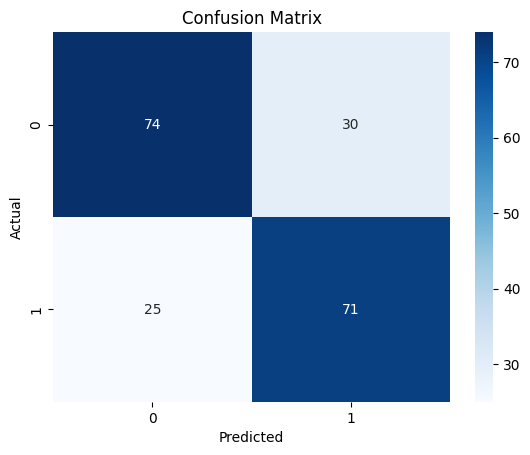

In [112]:
# ✅ 2. Classification Report and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


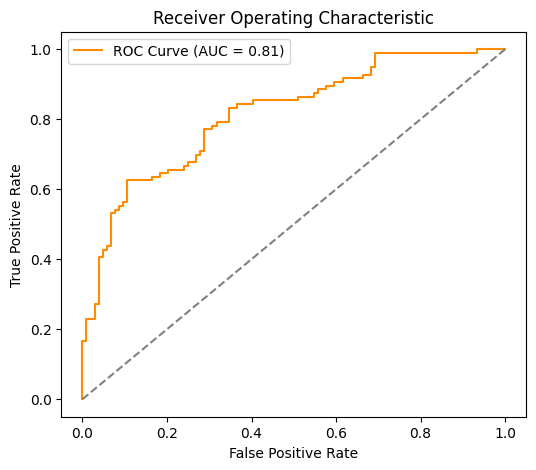

In [114]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


<hr>

In [98]:
# 🔹 2. Simple RNN

model = Sequential([
    Embedding(10000, 128, input_length=10),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.5128 - loss: 0.7108 - val_accuracy: 0.5350 - val_loss: 0.6921
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5767 - loss: 0.6332 - val_accuracy: 0.4800 - val_loss: 0.7048
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6470 - loss: 0.5934 - val_accuracy: 0.5850 - val_loss: 0.6869
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5954 - loss: 0.6209 - val_accuracy: 0.5350 - val_loss: 0.7046
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6153 - loss: 0.5931 - val_accuracy: 0.5200 - val_loss: 0.7439


In [99]:
# 🔹 3. LSTM

model = Sequential([
    Embedding(10000, 128, input_length=10),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.5146 - loss: 0.6955 - val_accuracy: 0.5350 - val_loss: 0.6914
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5631 - loss: 0.6911 - val_accuracy: 0.4750 - val_loss: 0.6957
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5463 - loss: 0.6899 - val_accuracy: 0.5400 - val_loss: 0.6912
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5226 - loss: 0.6814 - val_accuracy: 0.4500 - val_loss: 0.6976
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5955 - loss: 0.6292 - val_accuracy: 0.4650 - val_loss: 0.7074


In [100]:
# 🔹 4. GRU

model = Sequential([
    Embedding(10000, 128, input_length=10),
    GRU(64),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.5364 - loss: 0.6944 - val_accuracy: 0.5300 - val_loss: 0.6916
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5250 - loss: 0.6934 - val_accuracy: 0.5350 - val_loss: 0.6913
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5250 - loss: 0.6906 - val_accuracy: 0.4700 - val_loss: 0.6928
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5539 - loss: 0.6825 - val_accuracy: 0.4700 - val_loss: 0.6966
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5714 - loss: 0.6590 - val_accuracy: 0.4750 - val_loss: 0.6967


In [101]:
# 🔹 5. Bidirectional LSTM

model = Sequential([
    Embedding(10000, 128, input_length=10),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.4968 - loss: 0.6938 - val_accuracy: 0.5800 - val_loss: 0.6881
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7931 - loss: 0.6409 - val_accuracy: 0.7450 - val_loss: 0.5804
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9201 - loss: 0.3257 - val_accuracy: 0.7150 - val_loss: 0.5357
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9914 - loss: 0.0959 - val_accuracy: 0.8050 - val_loss: 0.5557
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9968 - loss: 0.0225 - val_accuracy: 0.7650 - val_loss: 0.6582


In [102]:
# 🔹 6. 1D CNN

model = Sequential([
    Embedding(10000, 128, input_length=10),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5025 - loss: 0.6979 - val_accuracy: 0.5300 - val_loss: 0.6909
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9762 - loss: 0.6259 - val_accuracy: 0.5200 - val_loss: 0.6870
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9515 - loss: 0.4955 - val_accuracy: 0.6750 - val_loss: 0.6640
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9910 - loss: 0.2642 - val_accuracy: 0.7100 - val_loss: 0.5591
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9964 - loss: 0.0727 - val_accuracy: 0.7450 - val_loss: 0.4937


In [ ]:
# 🔹 7. LSTM + CNN

model = Sequential([
    Embedding(10000, 128, input_length=10),
    LSTM(64, return_sequences=True),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


In [26]:
# # 🔹 8. Bidirectional LSTM + Attention (Custom Attention Layer)

# class AttentionLayer(tf.keras.layers.Layer):
#     def __init__(self):
#         super(AttentionLayer, self).__init__()

#     def call(self, inputs):
#         query, value = inputs, inputs
#         score = tf.matmul(query, value, transpose_b=True)
#         weights = tf.nn.softmax(score, axis=-1)
#         context = tf.matmul(weights, value)
#         return tf.reduce_mean(context, axis=1)

# inputs = Input(shape=(10,))
# x = Embedding(10000, 128)(inputs)
# x = Bidirectional(LSTM(64, return_sequences=True))(x)
# x = AttentionLayer()(x)
# output = Dense(1, activation='sigmoid')(x)

# model = Model(inputs, output)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


<hr>

<hr>

<hr>

<hr>

<hr>

<hr>

# END

# WordCloud

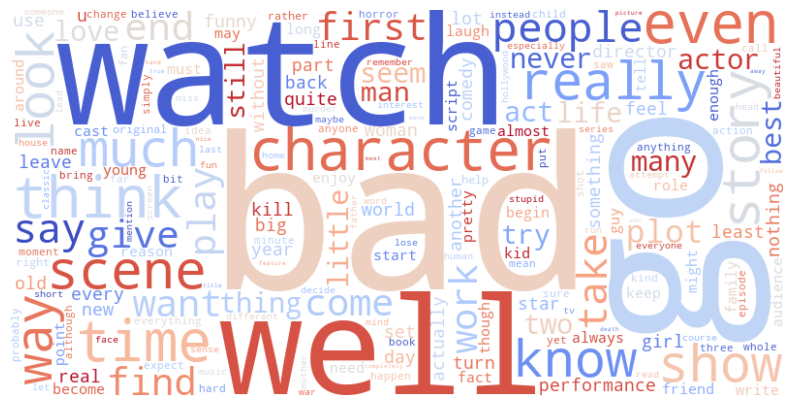

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the cleaned text data into one large string
text_data = ' '.join(df['review_filtered'].astype(str))

# Create a WordCloud object
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
# wordcloud = WordCloud(max_words=100, background_color='white').generate(text_data)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


<hr>